<a href="https://colab.research.google.com/github/HarshaLLabade/My_Projects/blob/main/Chess_Game_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/HarshaLLabade/ICT/main/Data%20sets/games.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [ ]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [ ]:
df.head(2)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4


In [ ]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

## Checking null values

In [ ]:
df.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [ ]:
## No missing values.

## Box plots of integers type variables

In [3]:
Int_features=[]
for i in range(len(df.columns)):
  if df[df.columns[i]].dtype=='int64':
    Int_features.append(df.columns[i])

Int_features

['turns', 'white_rating', 'black_rating', 'opening_ply']

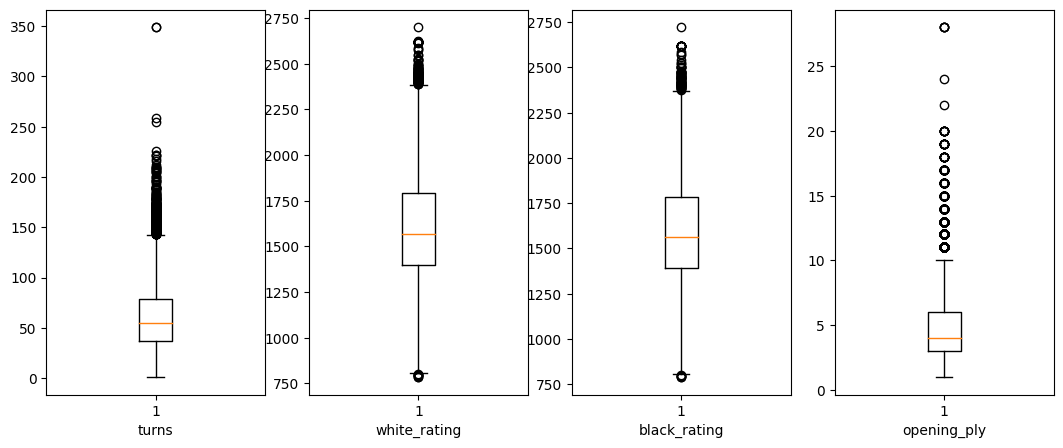

In [5]:
plt.figure(figsize=[13,5])
for i in range(0,len(Int_features)):
  plt.subplot(1,4,i+1)
  plt.xlabel(Int_features[i])
  plt.boxplot(df[Int_features[i]])

In [ ]:
## Too many outliers

In [17]:
df['turns'].quantile([0,0.25,0.5,0.75,0.90,0.92,0.94,0.96,0.98,0.99,1])
## We set the limit for column "turns" upto 150 so that we get 98% clean data.

0.00      1.0
0.25     37.0
0.50     55.0
0.75     79.0
0.90    107.0
0.92    113.0
0.94    119.0
0.96    129.0
0.98    144.0
0.99    157.0
1.00    349.0
Name: turns, dtype: float64

In [18]:
df['white_rating'].quantile([0,0.09,0.13,0.25,0.5,0.75,0.96,0.98,0.99,1])
## We set the limit for column "white_rating" upto 2300 so that we get approx 98% or 99% clean data.

0.00     784.00
0.09    1220.00
0.13    1278.00
0.25    1398.00
0.50    1567.00
0.75    1793.00
0.96    2156.00
0.98    2239.00
0.99    2307.43
1.00    2700.00
Name: white_rating, dtype: float64

In [19]:
df['black_rating'].quantile([0,0.09,0.13,0.25,0.5,0.75,0.96,0.98,0.99,1])
## We set the limit for column "black_rating" upto 2300 so that we get approx 98% or 99% clean data.

0.00     789.00
0.09    1210.00
0.13    1269.41
0.25    1391.00
0.50    1562.00
0.75    1784.00
0.96    2139.00
0.98    2227.86
0.99    2294.00
1.00    2723.00
Name: black_rating, dtype: float64

In [20]:
df['opening_ply'].quantile([0,0.25,0.5,0.75,0.96,0.98,0.99,1])
## We set the limit for column 'opening_ply' upto 12 or 13 so that we get approx 98% or 99% clean data.

0.00     1.0
0.25     3.0
0.50     4.0
0.75     6.0
0.96    11.0
0.98    12.0
0.99    14.0
1.00    28.0
Name: opening_ply, dtype: float64

## Removing Outliers

In [21]:
for x in Int_features:
  Q1 = df[x].quantile(0.25)     # Mark 25% of the data
  Q3 = df[x].quantile(0.75)     # Mark 75% of the data
  Range = Q3 - Q1               # Range where maximum data lies
  lower = Q1 - (1.5)*Range       # New lower bound for the data
  upper = Q3 + (1.5)*Range       # New upper bound for the data
  # Here 1.5 is just a scaling factor it may change for other context.
  # In the following code, if we observe the data values in our integer type data columns are outside from new bounds
  # then we shift those values at the edge of our bound.

  for i,data in df.iterrows():
    if data[x]<lower:
      df.at[i,x]=lower
    elif data[x]>upper:
      df.at[i,x]=upper



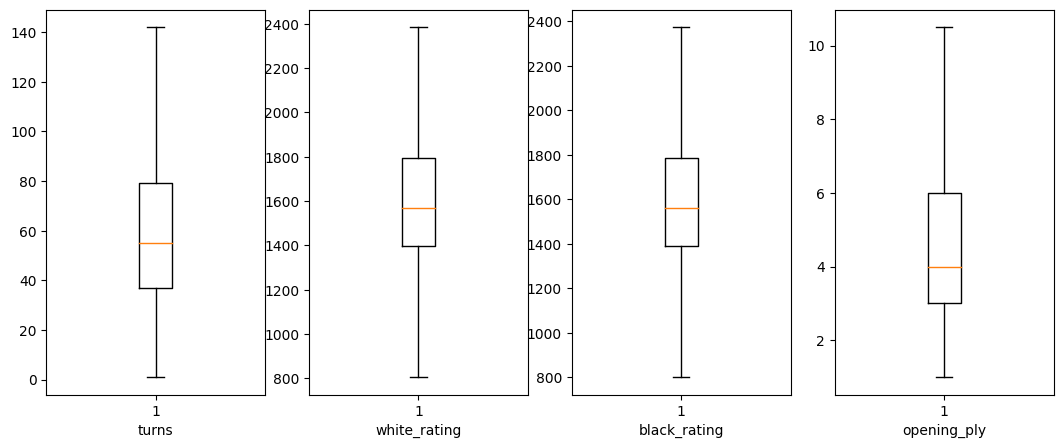

In [22]:
plt.figure(figsize=[13,5])
for i in range(0,len(Int_features)):
  plt.subplot(1,4,i+1)
  plt.xlabel(Int_features[i])
  plt.boxplot(df[Int_features[i]])

## First change in dataset removeing the "moves" column

In [38]:
# moves and number of turns are appeard to be same, so remove the "moves" column.
df_update_1=df.copy()
df_update_1.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [39]:
df_update_1 = df_update_1.drop(["moves","opening_name"],axis=1)
df_update_1.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'opening_eco', 'opening_ply'],
      dtype='object')

## Checking the duplicate entries

In [40]:
Obj_features=[]
for i in range(len(df_update_1.columns)):
  if df_update_1[df_update_1.columns[i]].dtype=='object':
    Obj_features.append(df_update_1.columns[i])

Obj_features

['id',
 'victory_status',
 'winner',
 'increment_code',
 'white_id',
 'black_id',
 'opening_eco']

In [41]:
df_update_1['id'].value_counts()

id
XRuQPSzH    5
edYOVb5F    4
o4T7dj5h    4
I8odmGjb    4
ZPHBiKBY    4
           ..
BhFsUnIo    1
1fDJ7N8j    1
ND68cHO6    1
clnqpkWZ    1
N8G2JHGG    1
Name: count, Length: 19113, dtype: int64

In [42]:
mask=(df_update_1['id']=='I8odmGjb')
df_update_1[mask]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_ply
205,I8odmGjb,False,1.503740e+12,1.503740e+12,15,mate,white,7+2,striker123,1806.0,taranga,1289.0,C45,7.0
11432,I8odmGjb,False,1.503741e+12,1.503741e+12,15,mate,white,7+2,striker123,1806.0,taranga,1289.0,C45,7.0
13759,I8odmGjb,False,1.503741e+12,1.503741e+12,15,mate,white,7+2,striker123,1806.0,taranga,1289.0,C45,7.0
19080,I8odmGjb,False,1.503741e+12,1.503741e+12,15,mate,white,7+2,striker123,1806.0,taranga,1289.0,C45,7.0


In [43]:
# All are repeated / duplicate entries, hence we get all distinct entries.
df_update_1 = df_update_1.drop_duplicates(subset=['id'])

In [44]:
df_update_1.head(2)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500.0,a-00,1191.0,D10,5.0
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322.0,skinnerua,1261.0,B00,4.0


In [46]:
print(df_update_1["created_at"].describe(),"\n","\n",df_update_1["last_move_at"].describe(),"\n")
print(df_update_1["created_at"].value_counts(),"\n","\n",df_update_1["last_move_at"].value_counts())

count    1.911300e+04
mean     1.483413e+12
std      2.833975e+10
min      1.376772e+12
25%      1.476910e+12
50%      1.495670e+12
75%      1.503080e+12
max      1.504493e+12
Name: created_at, dtype: float64 
 
 count    1.911300e+04
mean     1.483414e+12
std      2.833964e+10
min      1.376772e+12
25%      1.476912e+12
50%      1.495670e+12
75%      1.503080e+12
max      1.504494e+12
Name: last_move_at, dtype: float64 

created_at
1.504210e+12    45
1.504140e+12    39
1.504200e+12    38
1.503860e+12    37
1.504050e+12    32
                ..
1.504365e+12     1
1.504256e+12     1
1.504255e+12     1
1.504454e+12     1
1.499643e+12     1
Name: count, Length: 12640, dtype: int64 
 
 last_move_at
1.504210e+12    46
1.504140e+12    39
1.504200e+12    35
1.503860e+12    34
1.504040e+12    33
                ..
1.501424e+12     1
1.501418e+12     1
1.501417e+12     1
1.501417e+12     1
1.499644e+12     1
Name: count, Length: 12670, dtype: int64


In [47]:
## Here we remove two columns "created_at" and "last_move_at" they just represents the time taken by players to play the game,
# so we remove them it doesn't effect the analysis because we have the time control feature of the game in "increment_code".

## Second change in the dataset

In [48]:
df_update_2=df_update_1.copy()

In [49]:
df_update_2=df_update_1.drop(["created_at","last_move_at"],axis=1)

In [50]:
df_update_1.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'opening_eco', 'opening_ply'],
      dtype='object')

In [51]:
df_update_2.columns

Index(['id', 'rated', 'turns', 'victory_status', 'winner', 'increment_code',
       'white_id', 'white_rating', 'black_id', 'black_rating', 'opening_eco',
       'opening_ply'],
      dtype='object')

## One Hot Encoding

In [76]:
Encoded_df=df_update_2.copy()

In [77]:
Encoded_df.head(3)

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_ply
0,TZJHLljE,False,13,outoftime,white,15+2,bourgris,1500.0,a-00,1191.0,D10,5.0
1,l1NXvwaE,True,16,resign,black,5+10,a-00,1322.0,skinnerua,1261.0,B00,4.0
2,mIICvQHh,True,61,mate,white,5+10,ischia,1496.0,a-00,1500.0,C20,3.0


In [78]:
Encoded_df=pd.get_dummies(Encoded_df,columns=["rated","victory_status","increment_code","opening_eco","opening_ply"])

In [79]:
to_drop=["id","white_id","black_id"]
Encoded_df.drop(to_drop, inplace = True, axis = 1)

In [80]:
Encoded_df["winner"] = Encoded_df["winner"].map({"white":1,"black":2,"draw":3})

In [81]:
x = Encoded_df.drop("winner", axis = 1)
y = Encoded_df["winner"]

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier()
model=clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [85]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.63      0.64      0.63      2863
           2       0.59      0.58      0.59      2592
           3       0.95      0.98      0.96       279

    accuracy                           0.63      5734
   macro avg       0.72      0.73      0.73      5734
weighted avg       0.63      0.63      0.63      5734



In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report

lr1=LogisticRegression()
lr1.fit(x_train,y_train)
predictions=lr1.predict(x_test)

# print classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.64      0.69      0.66      2863
           2       0.62      0.58      0.60      2592
           3       1.00      0.98      0.99       279

    accuracy                           0.65      5734
   macro avg       0.76      0.75      0.75      5734
weighted avg       0.65      0.65      0.65      5734



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
# K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
n=3
Knn=KNeighborsClassifier(n_neighbors=n)
Knn.fit(x_train,y_train)
Knn_yhat=Knn.predict(x_test)
print(classification_report(y_test,Knn_yhat))

              precision    recall  f1-score   support

           1       0.59      0.65      0.62      2863
           2       0.56      0.55      0.56      2592
           3       0.12      0.03      0.05       279

    accuracy                           0.57      5734
   macro avg       0.43      0.41      0.41      5734
weighted avg       0.56      0.57      0.56      5734



In [89]:
# Random Forest Tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=4,random_state=0)
rf.fit(x_train,y_train)
rf_yhat=rf.predict(x_test)
print(classification_report(y_test,rf_yhat))

              precision    recall  f1-score   support

           1       0.51      0.98      0.67      2863
           2       0.72      0.07      0.13      2592
           3       0.00      0.00      0.00       279

    accuracy                           0.52      5734
   macro avg       0.41      0.35      0.27      5734
weighted avg       0.58      0.52      0.40      5734



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
# SVM
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
svm_yhat=svm.predict(x_test)
print(classification_report(y_test,svm_yhat))

              precision    recall  f1-score   support

           1       0.61      0.76      0.68      2863
           2       0.63      0.53      0.58      2592
           3       0.00      0.00      0.00       279

    accuracy                           0.62      5734
   macro avg       0.41      0.43      0.42      5734
weighted avg       0.59      0.62      0.60      5734



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
